<a href="https://colab.research.google.com/github/erandimalk-glitch/CMP7005_S1_25/blob/main/cmp7005_prac1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMP7005 – Programming for Data Analysis
## PRAC1 – From Data to Application Development
#
#
## Main analysis notebook:
### - Task 1: Data handling (Import, Merge)
### - Task 2: EDA (Fundamental Understanding, Preprocessing, Statistics + Visualisation)
### - Task 3: Model building (regression + classification)
#
#
#### NOTE: This assignement assumes that all India air quality CSV files are stored in a folder called "data/" and each file is of the form "<City>_data.csv" with consistent columns.



Mount Google Drive

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports and global settings

In [40]:
import os
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 6)


Point to Data sets

In [41]:
BASE_DIR = Path("/content/drive/MyDrive")

In [42]:
COURSE_FOLDER = "CMP7005 - Programming for Data Analysis"

DATA_DIR = BASE_DIR / COURSE_FOLDER / "Data Sets"

print("Using data folder:", DATA_DIR)

# Quick sanity check: list files in that folder
print("Files found in DATA_DIR:")
for p in DATA_DIR.iterdir():
    print(" -", p.name)

Using data folder: /content/drive/MyDrive/CMP7005 - Programming for Data Analysis/Data Sets
Files found in DATA_DIR:
 - Shillong_data.csv
 - Amritsar_data.csv
 - Delhi_data.csv
 - Visakhapatnam_data.csv
 - Patna_data.csv
 - Chennai_data.csv
 - Mumbai_data.csv
 - Talcher_data.csv
 - Gurugram_data.csv
 - Kochi_data.csv
 - Jaipur_data.csv
 - Jorapokhar_data.csv
 - Amaravati_data.csv
 - Bengaluru_data.csv
 - Ahmedabad_data.csv
 - Brajrajnagar_data.csv
 - Coimbatore_data.csv
 - Kolkata_data.csv
 - Aizawl_data.csv
 - Chandigarh_data.csv
 - Ernakulam_data.csv
 - Lucknow_data.csv
 - Thiruvananthapuram_data.csv
 - Hyderabad_data.csv
 - Guwahati_data.csv
 - Bhopal_data.csv


Utility Functions

In [43]:
def load_city_csvs(data_dir: Path = DATA_DIR):
    """Return a sorted list of all *_data.csv files in the given directory."""
    return sorted(data_dir.glob("*_data.csv"))


def parse_city_name(path: Path) -> str:
    """Extract the city name from a filename like 'Delhi_data.csv' -> 'Delhi'."""
    return path.stem.replace("_data", "")

# Task 01: Data Handling

Load and merge all city CSVs

In [44]:
csv_files = load_city_csvs()
print("Found CSV files:")
for f in csv_files:
    print("  -", f.name)

frames = []
for path in csv_files:
    city_name = parse_city_name(path)
    df_city = pd.read_csv(path)
    df_city["City"] = city_name
    frames.append(df_city)

df = pd.concat(frames, ignore_index=True)

print("\\nMerged DataFrame shape:", df.shape)
df.head()

Found CSV files:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv
\nMerged DataFrame shape: (29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#Task 02

##Task 2(a) - Fundamental and Understanding

In [45]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nColumn names:\n", df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nSample of data:")
display(df.head())

print("\nMissing values per column:")
print(df.isna().sum())

print("\\Basic descriptive statistics (numeric columns):")
display(df.describe(include="number"))

print("\nUnique cities:", df["City"].nunique())
print("Cities:", sorted(df["City"].unique()))

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df = df.sort_values(["City", "Date"]).reset_index(drop=True)

print("\nCheck Date conversion:")
display(df[["City", "Date"]].head())

Number of rows: 29531
Number of columns: 16

Column names:
 ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

Data types:
City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

Sample of data:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN



Missing values per column:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
\Basic descriptive statistics (numeric columns):


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000



Unique cities: 26
Cities: ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']

Check Date conversion:


,City,Date
0,Ahmedabad,2015-01-01
1,Ahmedabad,2015-01-02
2,Ahmedabad,2015-01-03
3,Ahmedabad,2015-01-04
4,Ahmedabad,2015-01-05


##Task 2(b) - Data preprocessing

In [46]:
# 1. Handle pollutant missing values
pollutant_cols = [
    "PM2.5",
    "PM10",
    "NO",
    "NO2",
    "NOx",
    "NH3",
    "CO",
    "SO2",
    "O3",
    "Benzene",
    "Toluene",
    "Xylene",
]

# 2. Remove exact duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows: {num_duplicates}")
df = df.drop_duplicates().reset_index(drop=True)

# 3. Remove rows with missing Date or City – they are essential
df = df.dropna(subset=["Date", "City"]).reset_index(drop=True)

# Drop rows where pollutants are all NaN AND AQI is NaN
mask_all_pollutants_nan = df[pollutant_cols].isna().all(axis=1)
mask_aqi_nan = df["AQI"].isna()
rows_dropped = df[mask_all_pollutants_nan & mask_aqi_nan].shape[0]
print("Rows dropped because all pollutants and AQI are NaN:", rows_dropped)
df = df[~(mask_all_pollutants_nan & mask_aqi_nan)].reset_index(drop=True)


# Impute remaining pollutant NaNs using city-wise medians

for col in pollutant_cols:
    df[col] = df.groupby("City")[col].transform(
        lambda s: s.fillna(s.median())
    )

# Impute AQI using city-wise median as well

df["AQI"] = df.groupby("City")["AQI"].transform(
    lambda s: s.fillna(s.median())
)

# If AQI_Bucket missing but AQI exists, we can derive a rough bucket.

def aqi_to_bucket(aqi: float) -> str:
    if pd.isna(aqi):
        return "Unknown"
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"


df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(aqi_to_bucket))

print("\nMissing data after preprocessing:")
print(df.isna().sum())

# 4. Feature engineering

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day


def month_to_season(m: int) -> str:
    if m in (12, 1, 2):
        return "Winter"
    elif m in (3, 4, 5):
        return "Spring"
    elif m in (6, 7, 8):
        return "Summer"
    else:
        return "Autumn"


df["Season"] = df["Month"].apply(month_to_season)

df["PM_ratio"] = df["PM2.5"] / df["PM10"]
df["PM_ratio"] = df["PM_ratio"].replace([np.inf, -np.inf], np.nan)
df["PM_ratio"] = df["PM_ratio"].fillna(df["PM_ratio"].median())

df_clean = df.copy()
display(df_clean.head())


Number of exact duplicate rows: 0
Rows dropped because all pollutants and AQI are NaN: 1374

Missing data after preprocessing:
City              0
Date              0
PM2.5             0
PM10           1991
NO                0
NO2               0
NOx             947
NH3            1559
CO                0
SO2               0
O3              159
Benzene        2488
Toluene        3623
Xylene        12468
AQI               0
AQI_Bucket        0
dtype: int64


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day,Season,PM_ratio
0,Ahmedabad,2015-01-01,58.37,107.96,0.92,18.22,17.15,NaN,0.92,27.64,...,0.00,0.02,0.00,384.5,Very Poor,2015,1,1,Winter,0.540663
1,Ahmedabad,2015-01-02,58.37,107.96,0.97,15.69,16.46,NaN,0.97,24.55,...,3.68,5.50,3.77,384.5,Very Poor,2015,1,2,Winter,0.540663
2,Ahmedabad,2015-01-03,58.37,107.96,17.40,19.30,29.70,NaN,17.40,29.07,...,6.80,16.40,2.25,384.5,Very Poor,2015,1,3,Winter,0.540663
3,Ahmedabad,2015-01-04,58.37,107.96,1.70,18.48,17.97,NaN,1.70,18.59,...,4.43,10.14,1.00,384.5,Very Poor,2015,1,4,Winter,0.540663
4,Ahmedabad,2015-01-05,58.37,107.96,22.10,21.42,37.76,NaN,22.10,39.33,...,7.01,18.89,2.78,384.5,Very Poor,2015,1,5,Winter,0.540663


##Task 2(c) – Statistics / computation-based EDA and visualisation

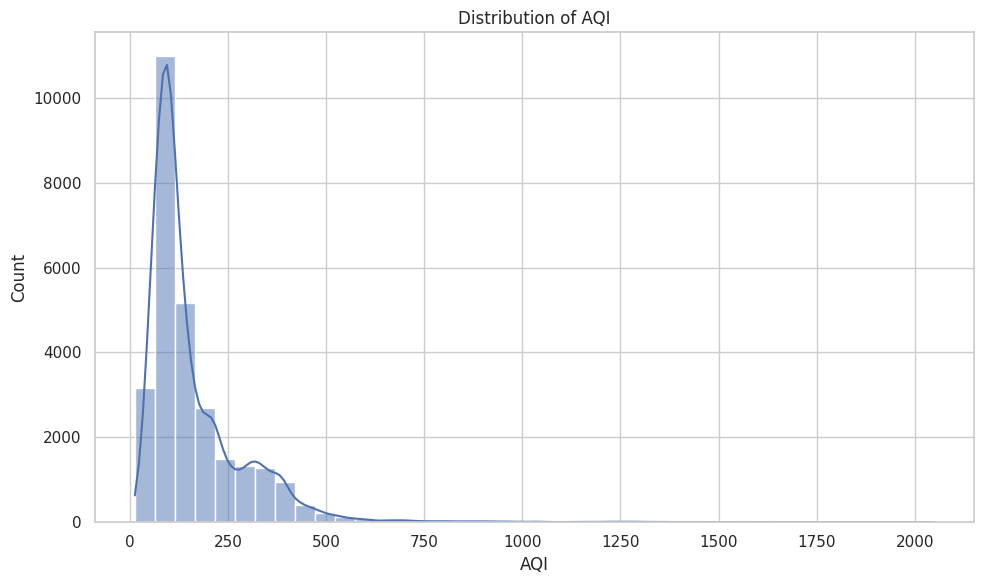

In [47]:
# Univariate: AQI distribution overall
plt.figure()
sns.histplot(df_clean["AQI"], kde=True, bins=40)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




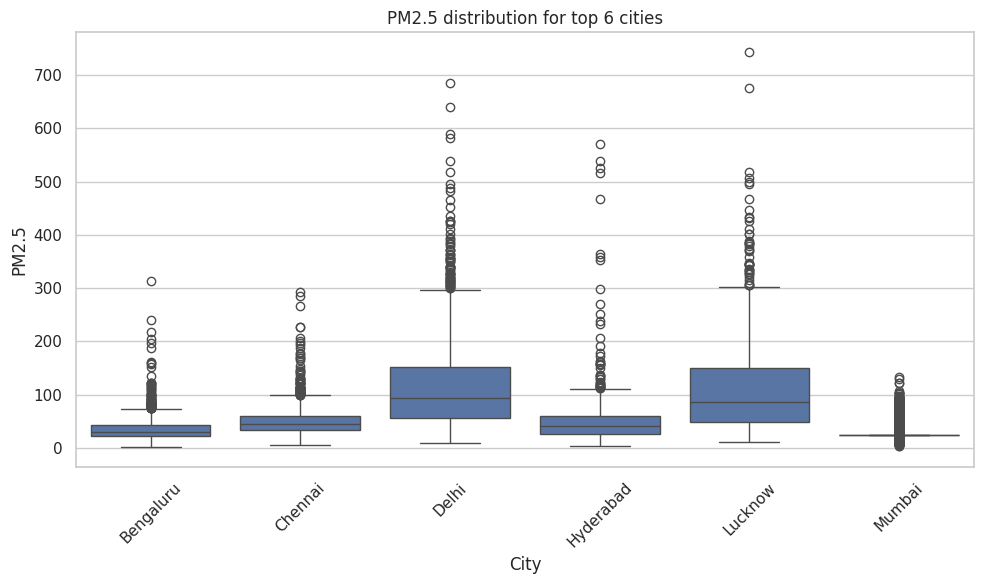

In [48]:
# Univariate: PM2.5 distribution by city

top_cities = df_clean["City"].value_counts().head(6).index.tolist()
plt.figure()
sns.boxplot(
    data=df_clean[df_clean["City"].isin(top_cities)],
    x="City",
    y="PM2.5",
)
plt.xticks(rotation=45)
plt.title("PM2.5 distribution for top 6 cities")
plt.tight_layout()
plt.show()



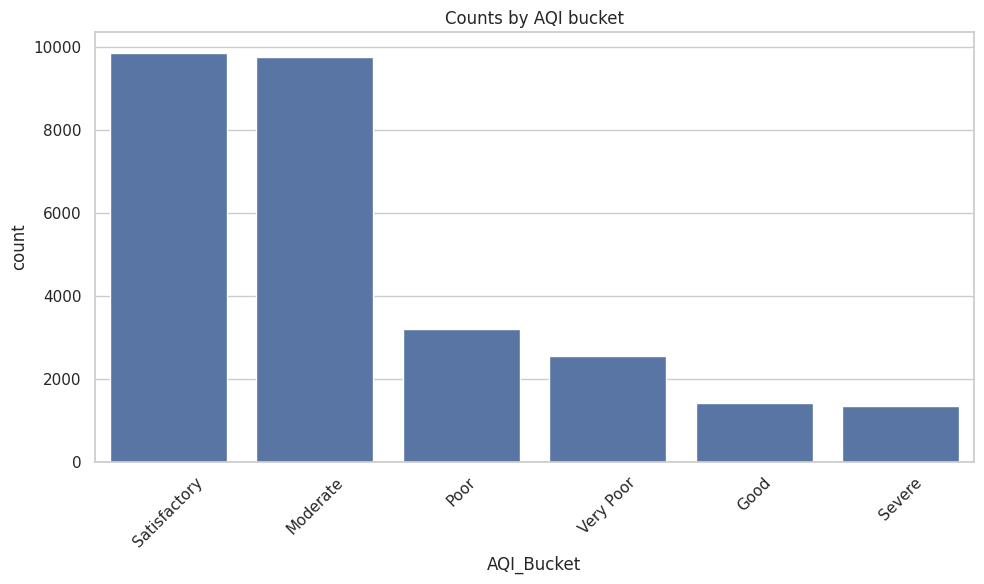

In [49]:
# Univariate: AQI_Bucket counts

plt.figure()
sns.countplot(data=df_clean, x="AQI_Bucket", order=df_clean["AQI_Bucket"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Counts by AQI bucket")
plt.tight_layout()
plt.show()



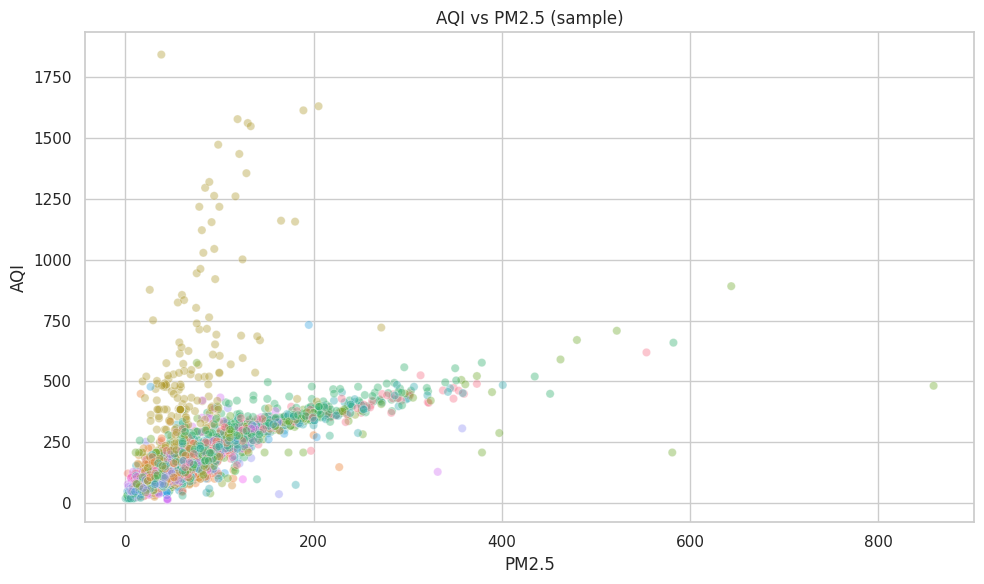

In [50]:
# Bivariate: AQI vs PM2.5 scatter

plt.figure()
sample = df_clean.sample(min(5000, len(df_clean)), random_state=42)
sns.scatterplot(
    data=sample,
    x="PM2.5",
    y="AQI",
    hue="City",
    alpha=0.4,
    legend=False,
)
plt.title("AQI vs PM2.5 (sample)")
plt.tight_layout()
plt.show()



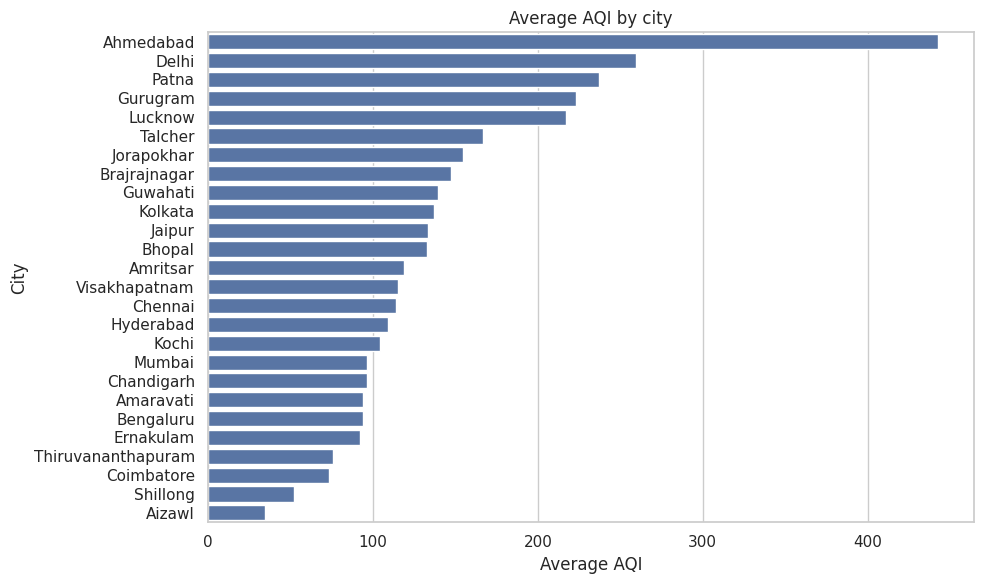

In [51]:
# Bivariate: Average AQI per city

avg_aqi_city = df_clean.groupby("City")["AQI"].mean().sort_values(ascending=False)
plt.figure()
sns.barplot(x=avg_aqi_city.values, y=avg_aqi_city.index)
plt.xlabel("Average AQI")
plt.ylabel("City")
plt.title("Average AQI by city")
plt.tight_layout()
plt.show()



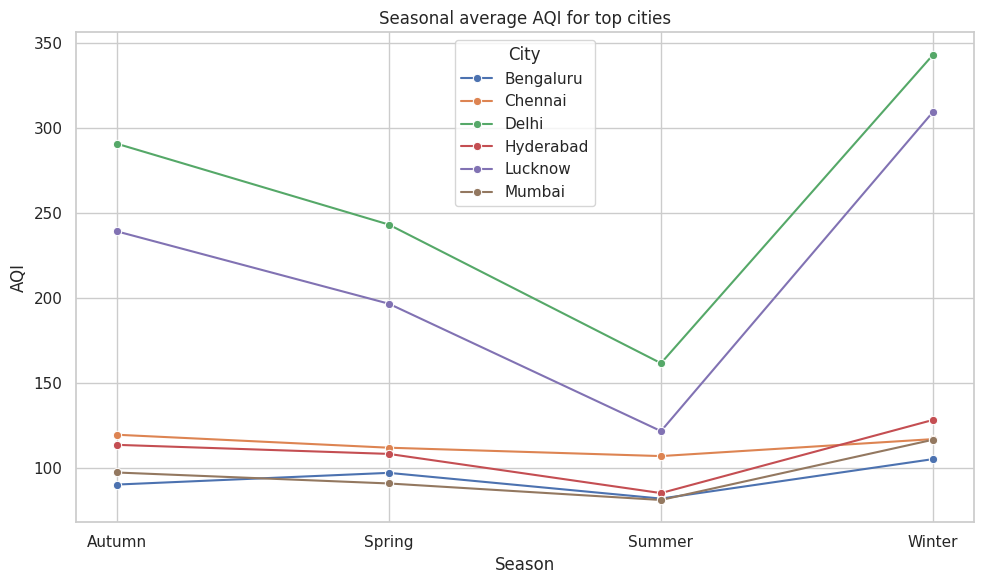

In [52]:
# Bivariate: Seasonal AQI pattern

avg_aqi_season = df_clean.groupby(["City", "Season"])["AQI"].mean().reset_index()
plt.figure()
sns.lineplot(
    data=avg_aqi_season[avg_aqi_season["City"].isin(top_cities)],
    x="Season",
    y="AQI",
    hue="City",
    marker="o",
)
plt.title("Seasonal average AQI for top cities")
plt.tight_layout()
plt.show()



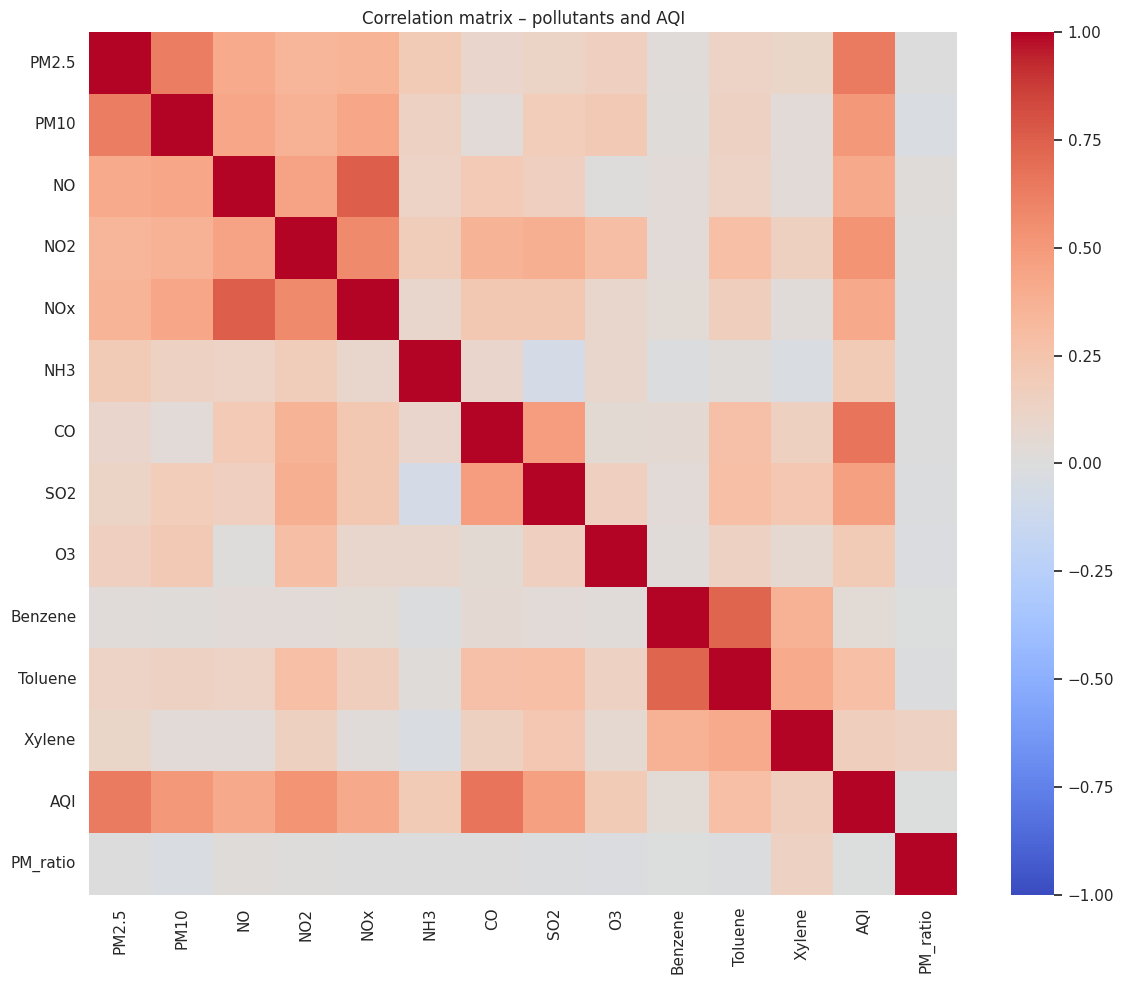


Correlation of AQI with key pollutants:
AQI         1.000000
CO          0.666905
PM2.5       0.633612
NO2         0.527433
PM10        0.506394
SO2         0.467297
NOx         0.421829
NO          0.416799
Toluene     0.282783
NH3         0.199131
O3          0.197428
Xylene      0.170726
Benzene     0.043327
PM_ratio   -0.007680
Name: AQI, dtype: float64


In [53]:
# Ultivariate: Correlation matrix and heatmap

corr_cols = pollutant_cols + ["AQI", "PM_ratio"]
corr = df_clean[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix – pollutants and AQI")
plt.tight_layout()
plt.show()

print("\nCorrelation of AQI with key pollutants:")
print(corr["AQI"].sort_values(ascending=False))

# Task 3 – Model Building

In [54]:
# Common feature set for models
feature_cols = pollutant_cols + ["PM_ratio"]

# For time-aware split: use Year
cutoff_year = 2019
train_df = df_clean[df_clean["Year"] < cutoff_year]
test_df = df_clean[df_clean["Year"] >= cutoff_year]

print("Training rows:", train_df.shape[0])
print("Test rows:", test_df.shape[0])

X_train = train_df[feature_cols].values
y_train_reg = train_df["AQI"].values
y_train_clf = train_df["AQI_Bucket"].values

X_test = test_df[feature_cols].values
y_test_reg = test_df["AQI"].values
y_test_clf = test_df["AQI_Bucket"].values

# Helper: regression evaluation
def evaluate_regression_model(name: str, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n[{name}] Regression performance")
    print("-" * 40)
    print(f"MAE  : {mae:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R^2  : {r2:.3f}")

Training rows: 16291
Test rows: 11866


# Model 1 – Linear Regression

Numeric transformer with imputation + scaling

In [55]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, list(range(len(feature_cols))))
    ],
    remainder="drop",
)

linreg_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LinearRegression()),
    ]
)

linreg_model.fit(X_train, y_train_reg)
y_pred_linreg = linreg_model.predict(X_test)

evaluate_regression_model("Linear Regression", y_test_reg, y_pred_linreg)

NameError: name 'SimpleImputer' is not defined

# Model 2 – KNN Regression

In [ ]:
knn_reg_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", KNeighborsRegressor(n_neighbors=5)),
    ]
)

knn_reg_model.fit(X_train, y_train_reg)
y_pred_knn_reg = knn_reg_model.predict(X_test)
evaluate_regression_model("KNN Regression (k=5)", y_test_reg, y_pred_knn_reg)

# Compare visually – predicted vs actual for KNN regression

plt.figure()
plt.scatter(y_test_reg, y_pred_knn_reg, alpha=0.3)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI (KNN)")
plt.title("Actual vs Predicted AQI – KNN Regression")
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         color="red", linestyle="--")
plt.tight_layout()
plt.show()

# Model 3 – KNN Classification (AQI_Bucket)

In [ ]:
knn_clf_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", KNeighborsClassifier(n_neighbors=7)),
    ]
)

knn_clf_model.fit(X_train, y_train_clf)
y_pred_knn_clf = knn_clf_model.predict(X_test)

print("\\n[KNN Classification] AQI_Bucket performance")
print("-" * 40)
print(classification_report(y_test_clf, y_pred_knn_clf))

cm = confusion_matrix(y_test_clf, y_pred_knn_clf)
plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.unique(y_test_clf),
    yticklabels=np.unique(y_test_clf),
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix – KNN classifier for AQI_Bucket")
plt.tight_layout()
plt.show()

In [ ]:
rf_clf_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=150,
            random_state=42,
            n_jobs=-1,
        )),
    ]
)

rf_clf_model.fit(X_train, y_train_clf)
y_pred_rf = rf_clf_model.predict(X_test)

print("\\n[RandomForest Classification] AQI_Bucket performance")
print("-" * 40)
print(classification_report(y_test_clf, y_pred_rf))

cm_rf = confusion_matrix(y_test_clf, y_pred_rf)
plt.figure()
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=np.unique(y_test_clf),
    yticklabels=np.unique(y_test_clf),
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix – RandomForest classifier for AQI_Bucket")
plt.tight_layout()
plt.show()

In [ ]:
import joblib

ARTIFACT_DIR = Path("artifacts")
ARTIFACT_DIR.mkdir(exist_ok=True)

joblib.dump(df_clean, ARTIFACT_DIR / "df_clean.pkl")
joblib.dump(feature_cols, ARTIFACT_DIR / "feature_cols.pkl")
joblib.dump(knn_reg_model, ARTIFACT_DIR / "knn_reg_model.pkl")
joblib.dump(rf_clf_model, ARTIFACT_DIR / "rf_clf_model.pkl")

print("\\nSaved artefacts to:", ARTIFACT_DIR.resolve())